# CHAPTER 5 오차역전파법

- 수치 미분으로 하면 단순하고 구현하기 쉽지만 계산 시간이 오래 걸린다는 단점<br>
> 그래서 가중치 매개변수의 기울기를 효율적으로 계산하는 '오차역전파법'<br>

<h3>5.1 계산 그래프 </h3>

계산 그래프 : 계산 과정을 그래프로 나타낸 것 <br>
- 복수의 노드와 에지(=간선)으로 표현<br>
- 노드는 원으로 표기, 원안에 연산 내용을 적는다 <br>
<br>
문제 : 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개 150원입니다. 소비세가 10%일 때 지불 금액을 구하세요 <br>
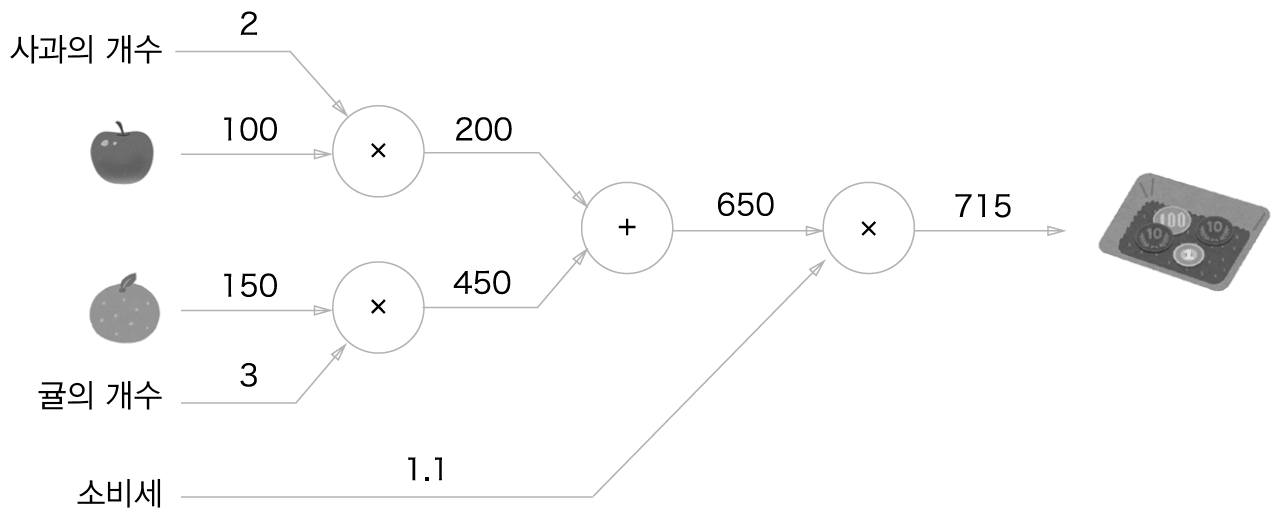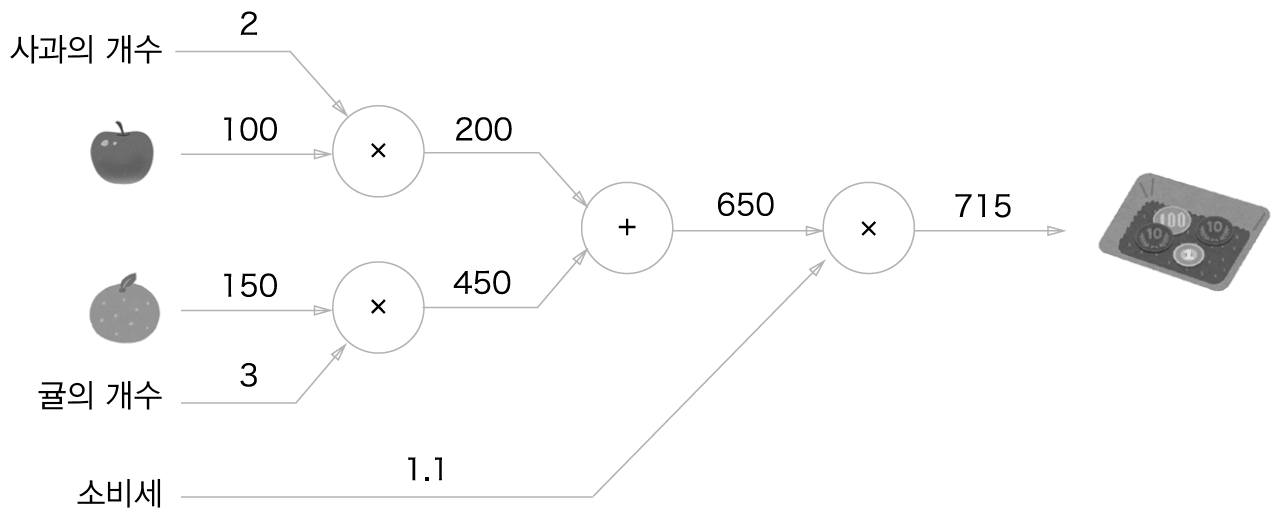
<br>
1. 계산 그래프를 구성한다. <br>
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. <br>

'계산을 왼쪽에서 오른쪽으로 진행'하는 단계를 <b>순전파(forward propagation)</b><br>
순전파와 반대 방향으로 전파는 <b>역전파(backward propagation)</b><br>


5.1.2 국소적 계산 <br>
국소적: 자신과 직접관계된 작은 범위 <br>
> 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다.<br>

전체 계산이 제아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 '국소적 계산'이다.<br>

note : 자동차도 복잡한 조립을 하지만 담당자들은 단순화된 노동을 하며 다음 단계로 넘긴다. <br>
복잡한 계산도 분해하면 단순한 계산으로 구성된다는 점

5.1.3 왜 계산 그래프로 푸는가?<br>
계산 그래프의 이점 <br>
1. 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있다.<br>
2. 계산 그래프는 중간 계산 결과를 모두 보관할 수 있다<br>
> 가장 큰 이유는 역전파를 통해 '미분'을 효율적으로 계산할 수 있다는 점 <br>

<br>

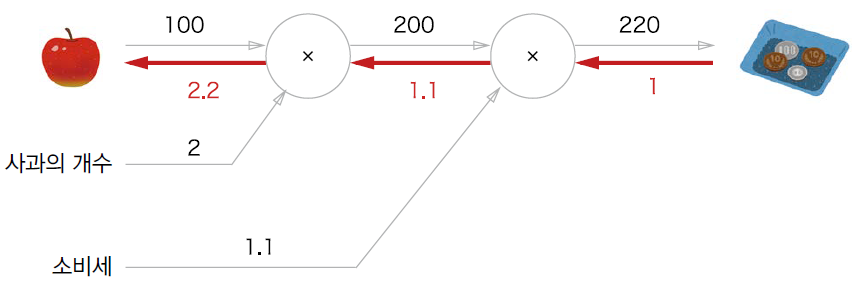<br>
사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지 알고 싶다.<br>
- 역전파는 순전파와는 반대 방향의 화살표(굵은 선)으로 그림 <br>
> 즉 사과가 1원 오르면 최종 금액은 2.2원 오른다 <br>

<br>

순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다

<h3> 5.2 연쇄법칙 </h3>
'국소적 미분'을 전달하는 원리는 연쇄법칙에 따른 것 <br>
<br>
5.2.1 계산 그래프의 역전파 <br>

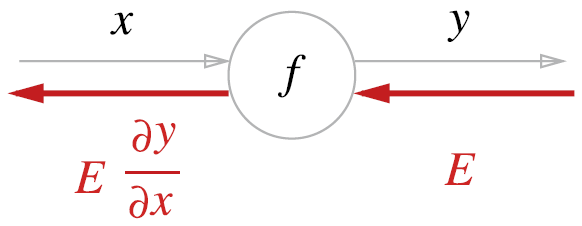<br>

역전파의 계산 절차: 신호E에 노드의 국소적 미분(ay/ax)을 곱한 후 다음 노드로 전달하는 것 <br>
- 이 국소적인 미분을 상류에서 전달된 값에 곱해 앞쪽 노드에 전달하는 것 <br>

5.2.2 연쇄법칙이란? <br>
합성함수 = 여러 함수로 구성된 함수 <br>
연쇄법칙 = 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.<br>
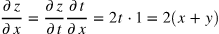<br>


5.2.3 연쇄법칙과 계산 그래프 <br>
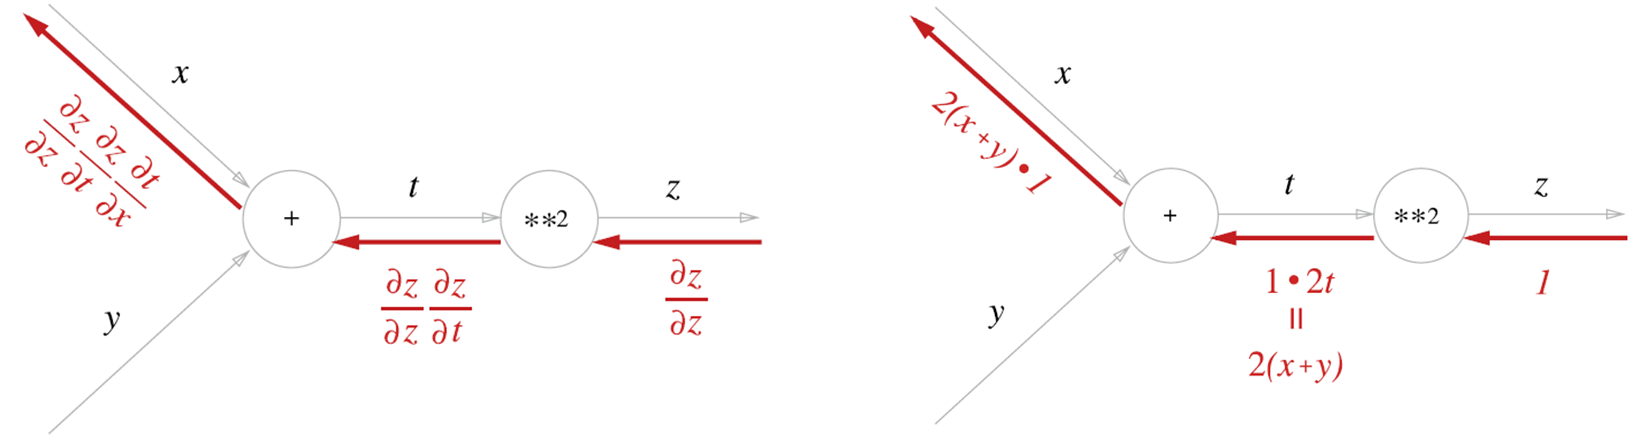<br>
국소적 미분(편미분)을 곱한 후 다음 노드로 전달<br>
역전파가 하는 일은 연쇄법칙의 원리와 같다

<h3> 5.3 역전파 </h3>
- '+'와 'x'로 역전파를 설명 <br><br>
5.3.1 덧셈 노드의 역전파 <br>
- 덧샘 노드의 역전파는 1을 곱하기만 할 뿐이므로 입력된 값을 그대로 다음 노드로 보내게된다. <br>
즉, 순방향 입력 신호의 값이 필요없다

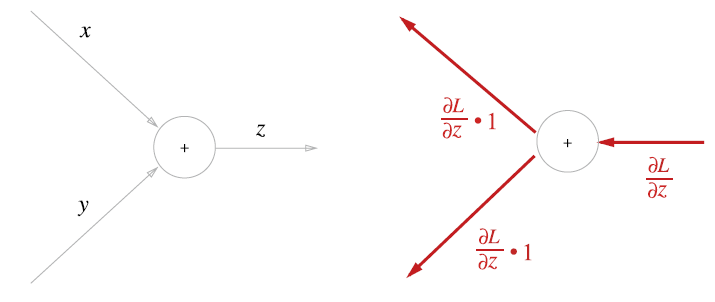

5.3.2 곱셈 노드의 역전파<br>
'서로 바꾼 값'을 곱해서 하류로 보낸다. <br>
그래서 순방향 입력 신호의 값이 필요

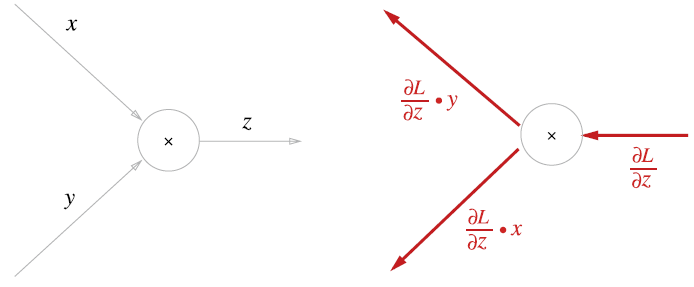

<h3> 5.4 단순한 계층 구현하기 </h3>
5.4.1 곱셈 계층 <br>
forward() = 순전파<br>
backward() = 역전파 <br>


In [1]:
# 곱셈
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self,x,y):
        self.x = x
        self.y = y
        out = x*y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y # x와 y를 바꿈
        dy = dout * self.x
        
        return dx,dy

In [9]:
apple = 100
apple_num =2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

# 역전파
dprice =1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple,dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple,dapple_num, dtax)

# 역전파는 순전파와 반대로 호출 
# backward()가 받는 인수는 '순전파의 출력에 대한 미분'

220.00000000000003
2.2 110.00000000000001 200


5.4.2 덧셈 계층 <br>

In [11]:
class addlayer:
    def __init__(self):
        pass
    # 덧셈은 입력값이 필요 없으니 아무것도 안한다
    
    def forward(self,x,y):
        out = x+y
        return out
    
    def backward(self,dout):
        dx = dout *1
        dy = dout *1
        return dx,dy
    

In [13]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = addlayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


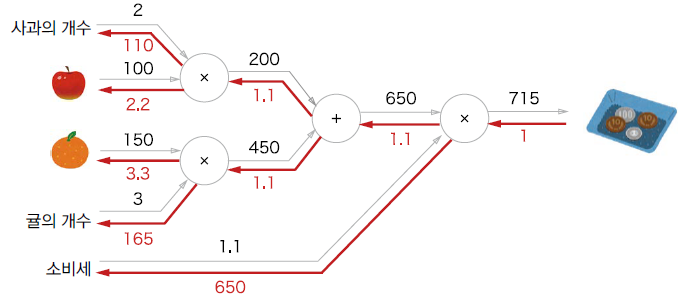

<h3> 5.5 활성화 함수 계층 구현하기 </h3>
5.5.1 ReLU 계층 <br>
[식]<br>

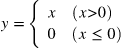 <br>

[미분식] <br>

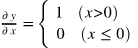<br>

입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다. <br>
x가 0이하면 하류로 신호를 보내지 않는다. <br>
<br>
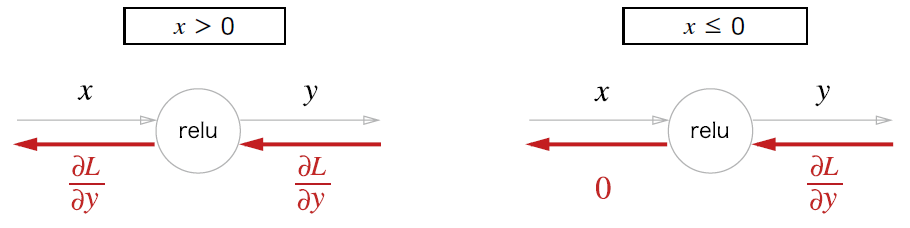

In [1]:
# relu구현
class Relu:
    def __init__(self):
        self.mask =None
    
    def forward(self,x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0 # 0 이하면 true 이기 때문에 0값을 가짐
        return out
    
    def backward(self,dout):
        dout[self.mask] = 0
        dx = dout  
        return dx
    

원소 값이 0 이하인 인덱스는 True, 그 외는 False로 유지 <br>

- 0 이하 입력은 0을 출력하면서 부분 활성화를 하여 계산량이 줄어든다 <br>
- 기울기 소실 문제가 줄어듬 <br>
- 선형함수이므로 미분 계산이 간단하고 스케일이 변하지 않는다. <br>


5.5.2 sigmoid 계층 <br>
 <br>

exp 는 y=exp(x) 계산을 수행하고, '/'노드는 y=1/x 계산을 수행 <br>
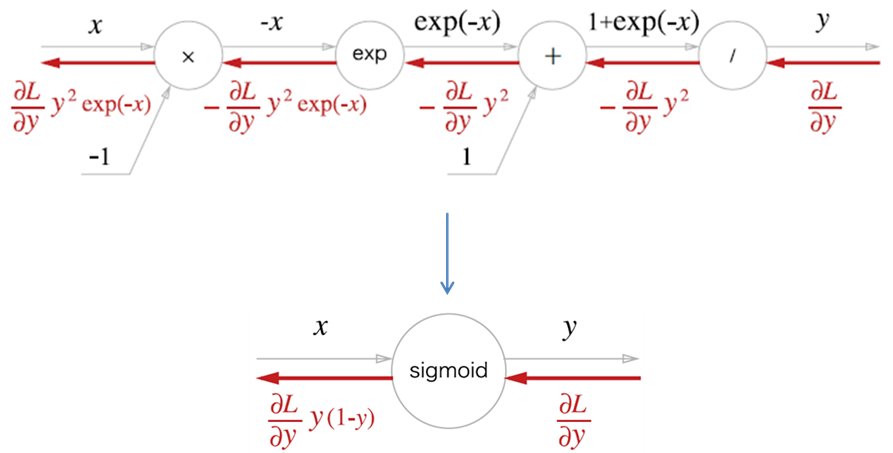

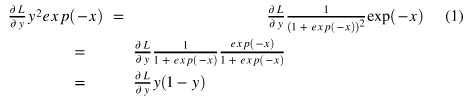

In [2]:
# sigmoid 구현
class sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self,x):
        out = 1 / (1+np.exp(-x))
        self.out = out
        
        return out 
    
    def backward(self, dout):
        dx = dout * (1.0-self.out) * self.out
        
        return dx
    

<h3> 5.6 Affine/Softmax 계층 구현하기 </h3>
5.6.1 Affine 계층 <br>

In [4]:
import numpy as np
x = np.random.rand(2) # 입력
w = np.random.rand(2,3) # 가중치
b = np.random.rand(3) # 편향 

print(x.shape)
print(w.shape)
print(b.shape)

y = np.dot(x,w)+b
print(y)

(2,)
(2, 3)
(3,)
[0.95739979 0.86844429 1.42615571]


In [14]:
np.dot(x,w)

array([0.75967395, 0.51422486, 0.65721336])

note: 순전파 때 수행하는 행렬의 곱은 기하학에서는 어파인 변환이라고 한다. <br>
어파인 변환을 수행하는 처리를 Affine 계층 이라고 구현 <br>

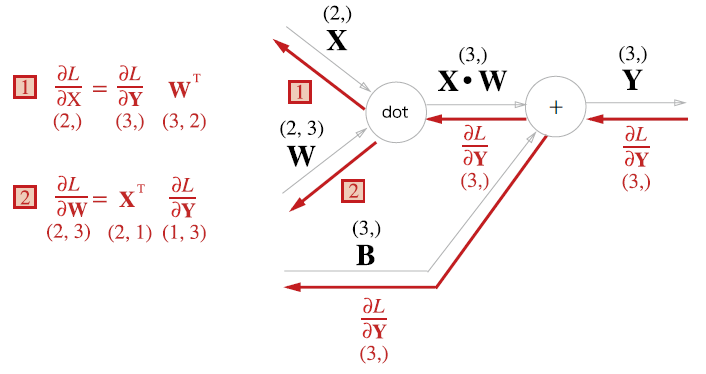<br>

dot 노드는 x와 비슷하게 반대 입력의 전치행렬을 곱한다.

5.6.2 배치용 Affine 계층 <br>
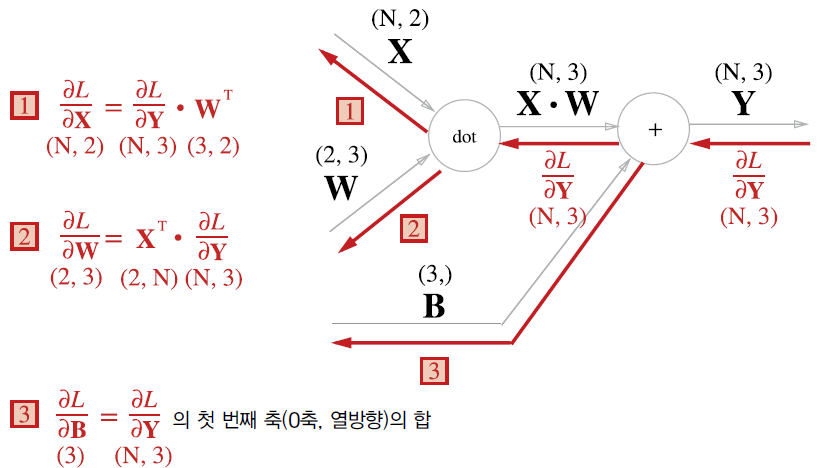

In [15]:
x_dot_w = np.array([[0,0,0],[10,10,10]])
b = np.array([1,2,3])

x_dot_w + b

array([[ 1,  2,  3],
       [11, 12, 13]])

In [20]:
dy = np.array([[1,2,3],[4,5,6]])

db = np.sum(dy,axis=0)
db

array([5, 7, 9])

In [21]:
# affine 구현
class affine:
    def __init__(self,w,b):
        self.w = w
        self.b = b
        self.x = None
        self.dw = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x,self.w)+self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

5.6.3 softmax-with-loss 계층 <br>

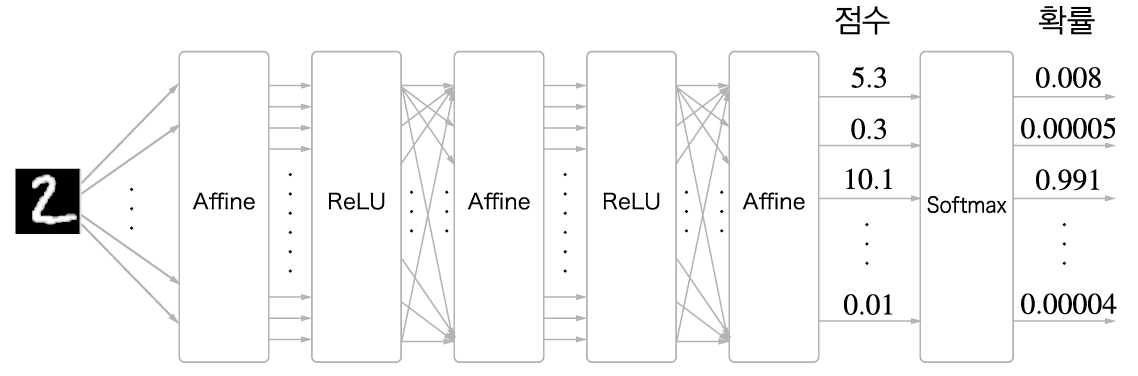 <br>

신경망에서 수행하는 작업은 학습과 추론 두가지 이다. <br>
추론할 때는 일반적으로 softmax 계층을 사용하지 않는다.<br>
마지막 affine 계층의 출력을 인식 결과로 사용하여 affine의 출력결과를 점수라고 한다. <br>
<b> 즉, 신경망 추론에서 답을 하나만 내는 경우에는 가장 높은 점수만 알면되니 softmax 계층은 필요없다 </b><br>
    반면 신경망을 학습할 때는 softmax 계층이 필요


소프트맥스 계층은 손실함수인 교차 엔트로피 오차도 포함하여 'softmax-with-loss 계층'이라는 이름으로 구현한다 <br>
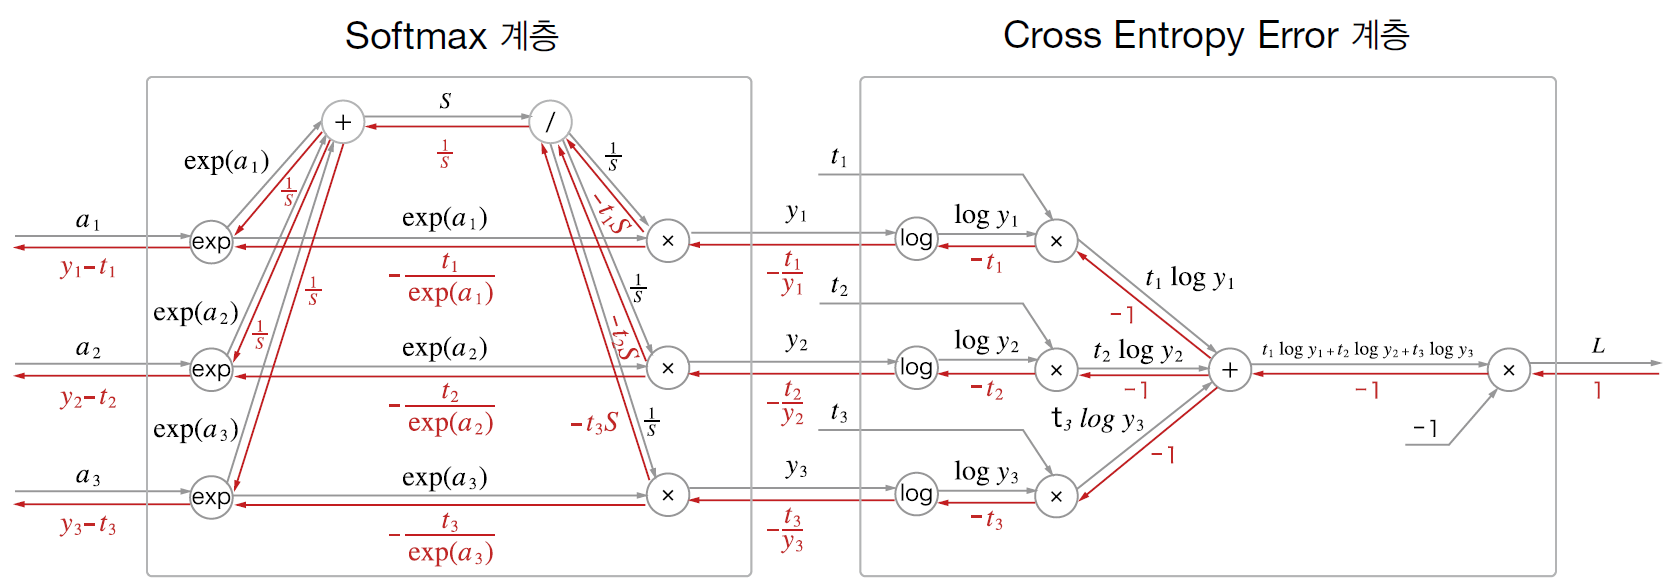<br>
<br>
[순전파] <br>
여기서는 3클래스 분류를 가정<br>
1. 이전 계층에서 3개의 입력(점수)을 받는다. -> (a1,a2,a3) <br>
2. softmax 계층이 정규화하여 (y1,y2,y3)를 출력 <br>
3. cross entropy error 계층에서 softmax 출력(y1,y2,y3)과 정답레이블(t1,t2,t3)를 받고 손실 L을 출력 <br>


[역전파]<br>
softmax 계층의 역전파결과는 (y1-t1,y2-t2,y3-t3)으로 soft 계층의 출력과 정답레이블의 차분 값이다. <br>
<b>이 차이인 오차가 앞 계층에 전해지는 것으로 이것은 신경망 학습의 중요한 성질이다.</b> <br>
<br>
신경망의 출력이 정답 레이블과 가까워지도록 가중치 매개변수의 값을 조정하는데 이 결과는 현재 출력과 정답 레이블의 오차를 있는 그대로 드러내는 것이다. <br>
note: 이런 말끔함은 교차엔트로피오차라는 함수가 그렇게 설계되었기 때문이다. (오차제곱합도 동일) <br>


ex_<br>
(0,1,0)일 때 softmax 계층이 (0.3,0.2,0.5)를 출력하면 (0.3, -0.8, 0.5)라는 커다란 오차를 전파한다. <br>
(0,1,0)일 때 softmax 계층이 (0.01,0.99,0)를 출력하면 (0.01,-0.01,0)으로 작은 오차를 전파하여 학습하는 정도가 작아진다. <br>

In [22]:
class softmaxwithloss:
    def __init__(self):
        self.loss = None # 손실
        self.y = None # softmax의 출력
        self.t = None # 정답 레이블 (one-hot vector)
        
    def forward(self,x,t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y,self.t)
        return self.loss

    def backward(self,dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t)/ batch_size # 주의 
        return dx

    # 역전파 때는 전파하는 값을 배치의 수로 나눠서 데이터 1개당 오차를 앞 계층으로 전파하는점 주의 

<h3> 5.7 오차역전파법 구현하기 </h3>


5.7.1 신경망 학습의 전체 그림 <br>
전제 -> 1단계 - 미니배치 -> 2단계 - 기울기 산출 -> 3단계 - 매개변수 갱신 -> 4단계 -반복 <br>
2단계 기울기 산출 부분에서 저번에는 수치미분을 사용했지만 <br>
이번에는 오차역전파법을 이용하여 수치미분과 달리 기울기를 효율족으로 빠르게 구할 수 있다.

5.7.2 오차역전파법을 적용한 신경망 구현하기 <br>

In [5]:
import sys,os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from collections import OrderedDict
from scratch.common.layers import *
from scratch.common.gradient import numerical_gradient


class TwoLayerNet:
    '''2층 신경망 구현'''
    def __init__(self, input_size, 
                 hidden_size, output_size, weight_init_std=0.01):
        '''
        초기화 수행
        Params:
            - input_size: 입력층 뉴런 수
            - hidden_size: 은닉층 뉴런 수
            - output_size: 출력층 뉴런 수
            - weight_init_std: 가중치 초기화 시 정규분포의 스케일
        '''
        # 가중치 초기화
        self.params = {
            'W1': weight_init_std * np.random.randn(input_size, hidden_size), #1번째 층의 가중치 
            'b1': np.zeros(hidden_size), # 1번째 층의 편향
            'W2': weight_init_std * np.random.randn(hidden_size, output_size),#2번째 층의 가중치
            'b2': np.zeros(output_size) # 2번째 층의 편향
        }
        
        # 계층 생성 (순서대로 유지)
        self.layers = OrderedDict({ 
            'Affine1': Affine(self.params['W1'], self.params['b1']),
            'Relu1': Relu(),
            'Affine2': Affine(self.params['W2'], self.params['b2'])
        })
        
        # 신경망의 마지막 계층 (softmaxwithloss계층)
        self.last_layer = SoftmaxWithLoss()
        
    
    def predict(self, x):
        '''예측(추론)
            Pararms:
                - x: 이미지 데이터'''
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    def loss(self, x, t):
        '''
        손실함수의 값을 계산
        Params:
            - x: 이미지데이터, t: 정답 레이블
        '''
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    
    def accuracy(self, x, t):
        '''
        정확도 계산
        Params:
            - x: 이미지 데이터
            - t: 정답 레이블
        '''
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    
    def numerical_gradient(self, x, t):
        '''
        미분을 통한 가중치 매개변수의 기울기 계산
        Params:
            - x: 이미지 데이터
            - t: 정답 레이블 
        '''
        loss_W = lambda W: self.loss(x, t)
        
        grads = {
            'W1': numerical_gradient(loss_W, self.params['W1']),
            'b1': numerical_gradient(loss_W, self.params['b1']),
            'W2': numerical_gradient(loss_W, self.params['W2']),
            'b2': numerical_gradient(loss_W, self.params['b2'])
        }
        return grads
    
    # 가중치 매개변수의 기울기를 오차역전파법으로 구한다.
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        # 결과 저장
        grads = {
            'W1': self.layers['Affine1'].dW, 'b1': self.layers['Affine1'].db,
            'W2': self.layers['Affine2'].dW, 'b2': self.layers['Affine2'].db
        }
        return grads

5.7.3 오차역전파법으로 구한 기울기 검증하기<br>
1. 수치 미분을 써서 구하는 방법<br>
2. 해석적으로 수식을 풀어 구하는 방법 (오차역전파법 이용)<br>
- 수치미분은 오차역전파법을 정확히 구현했는지 확인하기 위해 필요 <br>
<br>
구현하기 쉽다는 수치 미분의 이점으로 <br>
수치 미분의 결과와 오차역전파법의 결과를 비교하여 오차역전파법을 제대로 구현했는지 검증 <br>

<b>>   기울기 확인(gradient check)</b><br>

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.dataset.mnist import load_mnist

# mnist load
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key+":"+str(diff))

W1:5.184791019331013e-10
b1:3.546968523481138e-09
W2:8.042550542123814e-09
b2:1.39656256555043e-07


> 수치 미분과 오차역전파법으로 구한 기울기의 차이가 매우 작다. <br>

note: 결과 오차가 0이 되는일은 드물다. 컴퓨터가 할 수 있는 계산의 정밀도가 유한하기 때문

5.7.4 오차역전파법을 사용한 학습 구현하기 <br>

In [12]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from scratch.dataset.mnist import load_mnist

# mnist load
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

# Train Parameters
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

train_loss_list, train_acc_list, test_acc_list = [], [], []

for step in range(1, iters_num+1):
    # get mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(압도적으로 빠르다)
    
    # Update
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # loss
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if step % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('Step: {:4d}\tTrain acc: {:.5f}\tTest acc: {:.5f}'.format(step, 
                                                                        train_acc,
                                                                        test_acc))

Step:  600	Train acc: 0.90538	Test acc: 0.90610
Step: 1200	Train acc: 0.91925	Test acc: 0.92110
Step: 1800	Train acc: 0.93620	Test acc: 0.93500
Step: 2400	Train acc: 0.94383	Test acc: 0.94220
Step: 3000	Train acc: 0.95062	Test acc: 0.94970
Step: 3600	Train acc: 0.95678	Test acc: 0.95390
Step: 4200	Train acc: 0.95937	Test acc: 0.95740
Step: 4800	Train acc: 0.96323	Test acc: 0.96000
Step: 5400	Train acc: 0.96607	Test acc: 0.96100
Step: 6000	Train acc: 0.96863	Test acc: 0.96370
Step: 6600	Train acc: 0.97007	Test acc: 0.96090
Step: 7200	Train acc: 0.97245	Test acc: 0.96560
Step: 7800	Train acc: 0.97420	Test acc: 0.96670
Step: 8400	Train acc: 0.97608	Test acc: 0.96980
Step: 9000	Train acc: 0.97703	Test acc: 0.96760
Step: 9600	Train acc: 0.97742	Test acc: 0.96830


<h3> 5.8 정리 </h3>
- 계산 그래프를 이용하면 계산과정을 시각적으로 볼 수 있다. <br>
- 계산 그래프의 노드는 국소적 계산으로 구성, 국소적 계산을 조합해 전체 계산을 구현 <br>
- 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다. <br>
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다. (오차역전파법) <br>
- 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법의 구현이 제대로 나오는지 확인할 수 있다. (기울기 확인)